Customer Segmentation for Grocery, using RFM and Demographic Filtering. 

In [ ]:
def getRecency(transact):
  """ Get the recency value for each customer.

  Keyword argument:
  transact -- Transactions.csv
  """
  recency_df = transact[['customer_id']]
  recency_df['recency'] = 1096 - transact.time_id
  recency_df = recency_df.groupby('customer_id').min()
  return recency_df


def getFreq(transact):
  """ Get the frequency of each customer.

  Keyword argument:
  transact -- Transactions.csv
  """
  frequency_df = transact[['customer_id']]
  frequency_df['frequency'] = 1
  frequency_df = frequency_df.groupby('customer_id').sum()
  return frequency_df

def getMonetary(transact):
  """ Get the monetary value of each customer.

  Keyword argument:
  transact -- Transactions.csv
  """
  monteary_df= transact[['customer_id']]
  monteary_df['mvalue'] = transact['store_cost'] * transact['unit_sales']
  monteary_df = monteary_df.groupby(['customer_id']).sum()
  return monteary_df

def RScore(x,p,d):
  """ Get the recency score.

  Keyword argument:
  x -- value
  p -- recency, frequency, monetary_value
  d -- quartiles dict
  """
  if x <= d[p][0.25]:
    return 1
  elif x <= d[p][0.50]:
    return 2
  elif x <= d[p][0.75]: 
    return 3
  else:
    return 4
    
def FMScore(x,p,d):
  """ Get the recency score.

  Keyword argument:
  x -- value
  p -- recency, frequency, monetary_value
  d -- quartiles dict
  """
  if x <= d[p][0.25]:
    return 4
  elif x <= d[p][0.50]:
    return 3
  elif x <= d[p][0.75]: 
    return 2
  else:
    return 1

def RFMFunction(transact):
  """ Get the RFM score.

  Keyword argument:
  transact -- Transactions.csv
  
  """
  recency_df = getRecency(transact)
  frequency_df = getFreq(transact)
  monteary_df= getMonetary(transact)

  merged_df = pd.merge(recency_df,frequency_df,how='inner',on=['customer_id'])
  merged_df = pd.merge(merged_df,monteary_df,how='inner',on=['customer_id'])

  quantiles = merged_df.quantile(q=[0.25,0.5,0.75])
  quantiles = quantiles.to_dict()

  merged_df['r_quartile'] = merged_df['recency'].apply(RScore, args=('recency',quantiles,))
  merged_df['f_quartile'] = merged_df['frequency'].apply(FMScore, args=('frequency',quantiles,))
  merged_df['m_quartile'] = merged_df['mvalue'].apply(FMScore, args=('mvalue',quantiles,))
  merged_df['RFMScore'] = merged_df.r_quartile.map(str) + merged_df.f_quartile.map(str) + merged_df.m_quartile.map(str)
  return merged_df


In [ ]:
import pandas as pd

In [ ]:
transact = pd.read_csv('Transactions.csv')

In [ ]:
RFMFunction(transact)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

,recency,frequency,mvalue,r_quartile,f_quartile,m_quartile,RFMScore
customer_id,,,,,,,
3,258,30,236.3997,4,2,2,422
5,726,1,1.0368,4,4,4,444
6,189,12,171.6675,3,3,2,332
8,34,42,317.3745,1,1,1,111
9,83,13,108.1880,2,3,3,233
...,...,...,...,...,...,...,...
10275,179,22,204.2396,3,2,2,322
10277,58,26,371.7911,2,2,1,221
10278,247,28,207.4035,4,2,2,422


In [ ]:
segmented_rfm = RFMFunction(transact)
segmented_rfm[segmented_rfm['RFMScore']=='111'].sort_values('mvalue', ascending=False).head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

,recency,frequency,mvalue,r_quartile,f_quartile,m_quartile,RFMScore
customer_id,,,,,,,
5295,36,272,3095.2105,1,1,1,111
8452,31,231,3063.7189,1,1,1,111
4021,35,269,2904.1559,1,1,1,111
1297,33,251,2787.2027,1,1,1,111
1720,36,248,2656.1512,1,1,1,111
5466,39,209,2570.3992,1,1,1,111
4094,31,237,2494.9924,1,1,1,111
7862,35,197,2488.3918,1,1,1,111
4391,44,232,2368.2874,1,1,1,111


In [ ]:
segmented_rfm.RFMScore.value_counts()

111    1102
444    1034
211     567
333     466
222     460
322     456
433     455
344     450
122     418
233     385
133     251
311     243
244     222
422     193
443     161
144     139
432     136
332     126
343     126
232     111
132     110
334     101
434      91
221      79
121      77
243      71
321      65
212      60
323      57
112      55
223      54
312      52
143      50
123      47
234      45
423      42
134      34
411      26
421      22
224      22
324      21
124      14
213      10
424      10
412       6
113       5
431       3
413       2
313       2
114       1
242       1
Name: RFMScore, dtype: int64

In [ ]:
segmented_rfm = segmented_rfm[segmented_rfm['RFMScore'] == "111"]
segmented_rfm = segmented_rfm.reset_index()
segmented_rfm = segmented_rfm[['customer_id','RFMScore']]
segmented_rfm

,customer_id,RFMScore
0,8,111
1,48,111
2,99,111
3,104,111
4,117,111
...,...,...
1097,10131,111
1098,10173,111
1099,10186,111
1100,10208,111


Calculating age of the customer

In [ ]:
customer = pd.read_csv('customer.csv')
customer['birthyear'] = pd.DatetimeIndex(customer['birthdate']).year
customer['age'] = 1998 - customer['birthyear']
customer_age = customer[['customer_id','age']]
customer_age

,customer_id,age
0,1,37
1,2,83
2,3,88
3,4,29
4,5,47
...,...,...
10276,10277,24
10277,10278,72
10278,10279,85
10279,10280,30


Checking Montery values (how much each customer spent) with respect to age

In [ ]:
merged_customer_age = pd.merge(getMonetary(transact),customer_age,how='inner',on=['customer_id'])
#merged_customer_age
age_avg_mvalue = merged_customer_age.groupby(['age']).mean()
#age_avg_mvalue
#avg_age_sales = avg_age_sales.reset_index()
#avg_age_mvalue.plot.scatter(x = 'age', y = 'mvalue')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


NameError: ignored

From the above scatter plot, it is evident that the Monetary value of customers with respect to age is almost equally distributed. Therefore, not considering the 'age' parameter to further segment the customers.

Now, checking mvalue of the customer with the respect to the marital status.

In [ ]:
married_customer = customer[['customer_id','marital_status']]
#married_customer
married_customer = pd.merge(getMonetary(transact),married_customer,how='inner',on=['customer_id'])
married_avg_mvalue = married_customer.groupby(['marital_status']).mean()
married_avg_mvalue

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,customer_id,mvalue
marital_status,,
M,5154.204067,250.505157
S,5137.541393,249.058457


The average mvalue with respect to marital status is hardly varying. Therefore, not considering this parameter for further segmentation.

Similarly, checking monetary values of customers with respect to other available information.

Factors like yearly income, houseowner and number of cars owned were considered, keeping in mind the high cost of the offer.

In [ ]:
yearly_income_customer = customer[['customer_id','yearly_income']]
#yearly_income_customer
yearly_income_customer = pd.merge(getMonetary(transact),yearly_income_customer,how='inner',on=['customer_id'])
yearly_income_avg_mvalue = yearly_income_customer.groupby(['yearly_income']).mean()
yearly_income_avg_mvalue

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,customer_id,mvalue
yearly_income,,
$10K - $30K,5206.456568,249.402670
$110K - $130K,4964.658768,230.331896
$130K - $150K,5066.800000,278.663645
$150K +,5336.739130,233.113228
$30K - $50K,5095.102672,252.957909
$50K - $70K,5186.193152,237.109449
$70K - $90K,5186.278101,260.073540
$90K - $110K,5148.378590,248.034244


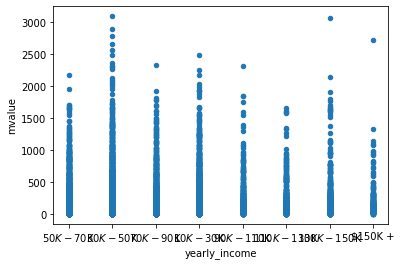

In [ ]:
yearly_income_customer.plot.scatter(x = 'yearly_income', y = 'mvalue')

In [ ]:
yearly_income_customer.yearly_income.value_counts()

$30K - $50K      2844
$10K - $30K      1888
$50K - $70K      1548
$70K - $90K      1032
$130K - $150K     435
$110K - $130K     422
$90K - $110K      383
$150K +           184
Name: yearly_income, dtype: int64

In [ ]:
#considering houseowner

houseowner_customer = customer[['customer_id','houseowner']]
#houseowner_customer
houseowner_customer = pd.merge(getMonetary(transact),houseowner_customer,how='inner',on=['customer_id'])
houseowner_avg_mvalue = houseowner_customer.groupby(['houseowner']).mean()
houseowner_avg_mvalue

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,customer_id,mvalue
houseowner,,
N,5103.728359,251.396030
Y,5173.000754,248.726629


In [ ]:
#considerng customers with respect to the number of cars they own

num_cars_owned_customer = customer[['customer_id','num_cars_owned']]
#num_cars_owned_customer
num_cars_owned_customer = pd.merge(getMonetary(transact),num_cars_owned_customer,how='inner',on=['customer_id'])
num_cars_owned_avg_mvalue = num_cars_owned_customer.groupby(['num_cars_owned']).mean()
num_cars_owned_avg_mvalue

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,customer_id,mvalue
num_cars_owned,,
0,5284.975610,251.585154
1,5116.811243,255.735809
2,5082.103763,248.849620
3,5173.550689,247.228937
4,5217.686258,246.682956


Other demographic filters to see the correlation for monetary values: age, member_card, total_children

In [ ]:
#considering gender

gender_customer = customer[['customer_id','gender']]
#gender_customer
gender_customer = pd.merge(getMonetary(transact),gender_customer,how='inner',on=['customer_id'])
gender_avg_mvalue = gender_customer.groupby(['gender']).mean()
gender_avg_mvalue

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,customer_id,mvalue
gender,,
F,5098.075768,253.872495
M,5192.668709,245.750061


Also, observing that end of November means Thanksgiving!! And Christmas/New Year to be celebrated soon. These are the family get-together occassions! 
Therefore, total number of children, a customer has is considered. And as expected, it does make a significant difference in the monetary value of a customer.

In [ ]:
total_children_customer = customer[['customer_id','total_children']]
#total_children_customer
total_children_customer = pd.merge(getMonetary(transact),total_children_customer,how='inner',on=['customer_id'])
total_children_avg_mvalue = total_children_customer.groupby(['total_children']).mean()
total_children_avg_mvalue

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,customer_id,mvalue
total_children,,
0,5051.453303,208.798660
1,5147.636522,220.311804
2,5112.683702,238.405404
3,5161.222864,256.634659
4,5217.258797,278.509118
5,5129.075171,300.245161


In [ ]:
#conidering which member card they own

member_card_customer = customer[['customer_id','member_card']]
#member_card_customer
member_card_customer = pd.merge(getMonetary(transact),member_card_customer,how='inner',on=['customer_id'])
member_card_avg_mvalue = member_card_customer.groupby(['member_card']).mean()
member_card_avg_mvalue

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,customer_id,mvalue
member_card,,
Bronze,5122.690408,249.689015
Golden,5217.520833,283.262463
Normal,5188.510214,244.096742
Silver,5086.969287,223.161979


In [ ]:
member_card_customer.member_card.value_counts()

Bronze    4858
Normal    2056
Golden    1008
Silver     814
Name: member_card, dtype: int64

As observed in the above results few factors affected the monetary value of the customers to a considerable extent, while other factors like age and marital status did not make much difference.

In [ ]:
def ChildrenScore(x):
    """ Get the score for number of children.

  Keyword argument:
  x -- number of children
  """
    if x == 5 :
        return 1
    elif x == 4 :
        return 2
    elif x == 3 :
        return 3
    elif x == 2 :
        return 4
    elif x == 1 :
        return 5
    elif x == 0 :
        return 6

In [ ]:
segmented_customer_children = total_children_customer
segmented_customer_children['children_score'] = segmented_customer_children['total_children'].apply(ChildrenScore)
#segmented_customer_children

merged_rfm_customer_children = pd.merge(segmented_customer_children, segmented_rfm,how='inner',on=['customer_id'])
#merged_rfm_customer_children

merged_rfm_customer_children['RFMChildren'] = merged_rfm_customer_children.RFMScore.map(str) + merged_rfm_customer_children.children_score.map(str)
#merged_rfm_customer_children.head()

merged_rfm_customer_children = merged_rfm_customer_children[merged_rfm_customer_children['RFMChildren'] == "1112"]
merged_rfm_customer_children = merged_rfm_customer_children.reset_index()
merged_rfm_customer_children = merged_rfm_customer_children[['customer_id','RFMChildren']]
merged_rfm_customer_children

,customer_id,RFMChildren
0,192,1112
1,364,1112
2,497,1112
3,504,1112
4,511,1112
...,...,...
235,9956,1112
236,9976,1112
237,10104,1112
238,10113,1112


In [ ]:
def CardScore(x):
    """ Get the score for member card.

  Keyword argument:
  x -- member card
  """
    if x == 'Golden' :
        return 1
    if x == 'Bronze' :
        return 2
    if x == 'Normal' :
        return 3
    if x == 'Silver' :
        return 4

In [ ]:
segmented_customer_card = member_card_customer
segmented_customer_card['card_score'] = segmented_customer_card['member_card'].apply(CardScore)
#segmented_customer_card
merged_rfm_card = pd.merge(segmented_customer_card, segmented_rfm,how='inner',on=['customer_id'])
#merged_rfm_card
merged_rfm_card['RFMCardScore'] = merged_rfm_card.RFMScore.map(str) + merged_rfm_card.card_score.map(str)
#merged_rfm_card.head()
merged_rfm_card = merged_rfm_card[merged_rfm_card['RFMCardScore'] == '1112']
merged_rfm_card = merged_rfm_card.reset_index()
merged_rfm_card = merged_rfm_card[['customer_id','RFMCardScore']]
merged_rfm_card

,customer_id,RFMCardScore
0,8,1112
1,48,1112
2,99,1112
3,104,1112
4,117,1112
...,...,...
625,10131,1112
626,10173,1112
627,10186,1112
628,10208,1112


In [ ]:
def gender(x):
    """ Get the score for customer gender.

  Keyword argument:
  x -- customer gender
  """
    if x == 'F' :
        return 1
    if x == 'M' :
        return 0

In [ ]:
segmented_customer_gender = gender_customer
segmented_customer_gender['gender_score'] = segmented_customer_gender['gender'].apply(gender)
#segmented_customer_gender
merged_rfm_gender = pd.merge(segmented_customer_gender, segmented_rfm,how='inner',on=['customer_id'])
#merged_rfm_gender
merged_rfm_gender['RFMGenderScore'] = merged_rfm_gender.RFMScore.map(str) + merged_rfm_gender.gender_score.map(str)
#merged_rfm_gender.head()
merged_rfm_gender = merged_rfm_gender[merged_rfm_gender['RFMGenderScore'] == '1111']
merged_rfm_gender = merged_rfm_gender.reset_index()
merged_rfm_gender = merged_rfm_gender[['customer_id','RFMGenderScore']]
merged_rfm_gender

,customer_id,RFMGenderScore
0,99,1111
1,104,1111
2,117,1111
3,192,1111
4,201,1111
...,...,...
549,10104,1111
550,10113,1111
551,10131,1111
552,10173,1111


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
yearly_income_customer = customer[['customer_id','yearly_income','houseowner','num_cars_owned']]
#yearly_income_customer

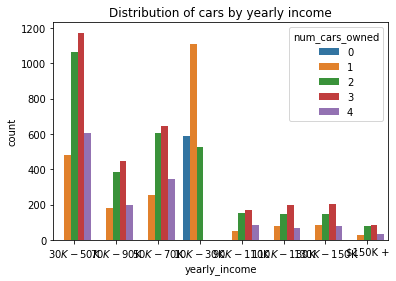

In [ ]:
sns.countplot(x="yearly_income", hue="num_cars_owned", data=yearly_income_customer);
plt.title('Distribution of cars by yearly income');

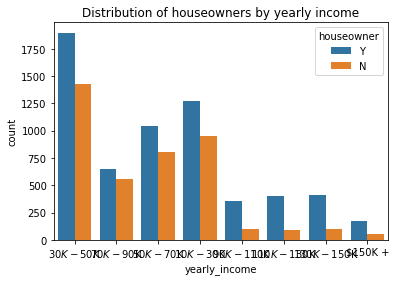

In [ ]:
sns.countplot(x="yearly_income", hue="houseowner", data=yearly_income_customer);
plt.title('Distribution of houseowners by yearly income');

In [ ]:
def houseowner(x):
    """ Get the score for houseowner

  Keyword argument:
  x -- houseowner
  """
    if x == 'Y' :
        return 1
    if x == 'N' :
        return 0

In [ ]:
segmented_customer_houseowner = houseowner_customer
segmented_customer_houseowner['houseowner_score'] = segmented_customer_houseowner['houseowner'].apply(houseowner)
#segmented_customer_houseowner
merged_rfm_houseowner = pd.merge(segmented_customer_houseowner, segmented_rfm,how='inner',on=['customer_id'])
#merged_rfm_houseowner
merged_rfm_houseowner['RFMHouseowner'] = merged_rfm_houseowner.RFMScore.map(str) + merged_rfm_houseowner.houseowner_score.map(str)
#merged_rfm_houseowner.head()
merged_rfm_houseowner = merged_rfm_houseowner[merged_rfm_houseowner['RFMHouseowner'] == '1111']
merged_rfm_houseowner = merged_rfm_houseowner.reset_index()
merged_rfm_houseowner = merged_rfm_houseowner[['customer_id','RFMHouseowner']]
merged_rfm_houseowner

,customer_id,RFMHouseowner
0,8,1111
1,117,1111
2,135,1111
3,178,1111
4,192,1111
...,...,...
640,10113,1111
641,10131,1111
642,10186,1111
643,10208,1111


In [ ]:
all_segments = pd.concat([merged_rfm_customer_children, merged_rfm_card,merged_rfm_gender,merged_rfm_houseowner])
all_segments = all_segments[['customer_id']]
all_segments

unique_customers = all_segments.sample(n=1000)
unique_customers.count()

customer_id    1000
dtype: int64

In [ ]:
unique_customers.to_csv('customers_list.csv',index=False)